In [1]:
!pip install tensorflow matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9959 - loss: 0.0130 - val_accuracy: 0.9925 - val_loss: 0.0361
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9965 - loss: 0.0111 - val_accuracy: 0.9913 - val_loss: 0.0421
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9920 - val_loss: 0.0417
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9966 - loss: 0.0092 - val_accuracy: 0.9928 - val_loss: 0.0442
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.9927 - val_loss: 0.0433
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.9930 - val_loss: 0.0415
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9971 - loss: 0.0072 - val_accuracy: 0.9938 - val_loss: 0.0428
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9975 - loss: 0.0060 - 

In [9]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f" Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9907 - loss: 0.0403
 Test Accuracy: 0.9923


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



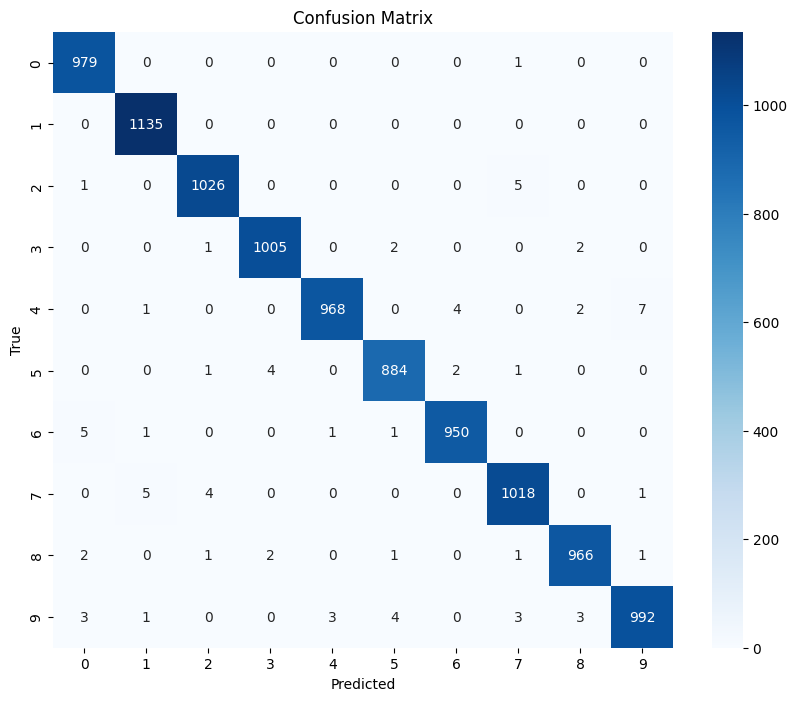

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


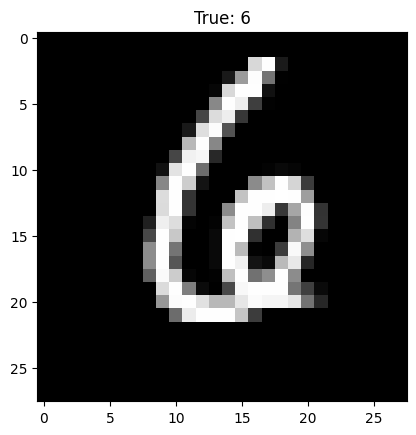

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted: 6


In [12]:
index = 123
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title(f"True: {y_test[index]}")
plt.show()

prediction = model.predict(X_test[index].reshape(1,28,28,1))
print("Predicted:", np.argmax(prediction))
